# Agricuture train Dataset

Agricutlure is the backone of Indian society. the history of Agriculture dates back to Indus Valley Civilization. As per 2018, agriculture employed more than 50% of the Indian work force and contributed 17–18% to country's GDP. 

Smart farming is an emrging concept in India which refers to farming managed using modern technology & communication like sensors to check the soil type,temperature, etc softwares to to target specific type of farming, robotics, AI & data analytics making agriculture more effective & efficient.

Machine learning is everywhere throughout the whole growing and harvesting cycle. It begins with a seed being planted in the soil — from the soil preparation, seeds breeding and water feed measurement — and it ends when neural networks pick up the harvest determining the ripeness with the help of computer vision.

Though Machine learning helps on predicting the outcome, but its the actual job of farmers which is very tedious one.Once the seeds are sown, he works days and nights to make sure that he cultivates a good harvest at the end of season. A good harvest is ensured by several factors such as availability of water, soil fertility, protecting crops from rodents, timely use of pesticides & other useful chemicals and nature. While a lot of these factors are difficult to control for, the amount and frequency of pesticides is something the farmer can control.

Pesticides are also special, because while they protect the crop with the right dosage. But, if you add more than required, they may spoil the entire harvest. A high level of pesticide can deem the crop dead / unsuitable for consumption among many outcomes. This data is based on crops harvested by various farmers at the end of harvest season. To simplify the problem, its asumed that all other factors like variations in farming techniques have been controlled for.




### Lets import the neccessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings ('ignore')

In [2]:
tdf=pd.read_csv('train_agriculture.csv')

In [3]:
tdf.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [4]:
tdf.tail()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
88853,F00155935,3337,1,0,2,10,12.0,44,3,0
88854,F00155938,3516,1,0,2,10,20.0,38,1,0
88855,F00155939,3516,1,0,2,15,40.0,8,2,0
88856,F00155942,3702,1,0,2,10,25.0,18,3,0
88857,F00155945,3895,1,0,2,20,37.0,7,3,0


In [5]:
tdf.shape

(88858, 10)

In [6]:
tdf.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

### Data Description

* ID - Unique id 
* Estimated_Insects_Counts = Estimated insects counts per sq.mtr.
* Crop_Type = Category of Crop (0,1)
* Soil_Type = Category of Soil(0,1)
* Pesticide_Use_Category = Types of Pesticide Used(1=Never,2 = Previously Used, 3= Currently USed)
* Number_Doses_Week = Number of doses per week
* Number_Weeks_Used = Number of weeks pesticide used
* Number_Weeks_Quid = Number of Weeks Quit.
* Season = Season Category(1,2,3)
* Crops_Damage = Category of damaged/alive crops(0=alive,1=Damage due to other causes,2=Damage due to pesticides

In [7]:
tdf.Number_Doses_Week.values

array([ 0,  0,  0, ..., 15, 10, 20], dtype=int64)

In [8]:
tdf.nunique()

ID                         88858
Estimated_Insects_Count       71
Crop_Type                      2
Soil_Type                      2
Pesticide_Use_Category         3
Number_Doses_Week             20
Number_Weeks_Used             64
Number_Weeks_Quit             51
Season                         3
Crop_Damage                    3
dtype: int64

* ID column is unique for each rows, may considering ddrop that at later stage. CRop_Type,Soil_Type,Pesticide_Use_Category,Season & Crop_Damage are all categorical datas with only 3 values.

In [9]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


In [10]:
d = tdf.isnull().sum()
d

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

* There are null values present in Number_Weeks_Used column which is a float datatype. Lets first fill missing values for this and the convert the dtype to int

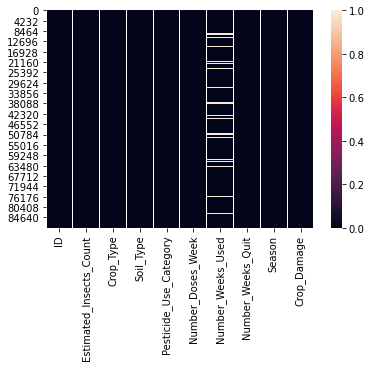

In [11]:
sns.heatmap(tdf.isnull())

In [12]:
tdf.fillna(method = 'ffill',inplace=True)

In [13]:
tdf.Number_Weeks_Used.isnull().sum()

0

In [14]:
tdf['Number_Weeks_Used']=tdf['Number_Weeks_Used'].astype('int64')

In [15]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       88858 non-null  object
 1   Estimated_Insects_Count  88858 non-null  int64 
 2   Crop_Type                88858 non-null  int64 
 3   Soil_Type                88858 non-null  int64 
 4   Pesticide_Use_Category   88858 non-null  int64 
 5   Number_Doses_Week        88858 non-null  int64 
 6   Number_Weeks_Used        88858 non-null  int64 
 7   Number_Weeks_Quit        88858 non-null  int64 
 8   Season                   88858 non-null  int64 
 9   Crop_Damage              88858 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 6.8+ MB


* The data is clean - no null values, all dtypes are int & is ready for visualizaion.

In [16]:
tdf.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.600531,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.395172,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


### Observations:

* Estimated_Insects_Count - Mean: 1399 | std - 849 | Max - 4097 & 75th percentile - 1898.
* Number_Doses_Week - Mean: 25.85% | std: 15.55| Max - 95 & 75th percentile - 40
* Number_Weeks_Used - mean - 28.6 | std - 12.40 | max - 67 & 75th percentile - 37
* Number_Weeks_Quit - mean: 9.6 | std: 9.9 | max - 50 & 75th quartile: 16
* Rest of the data are categorical datas

# Visualizations

### Univariate Analysis

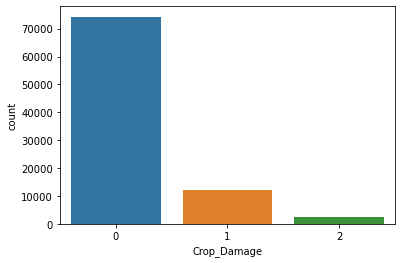

In [17]:
sns.countplot(tdf['Crop_Damage'])

Damage of crop through pesticide is very compared to damage through other reasons. Count of alive crops is very higher.

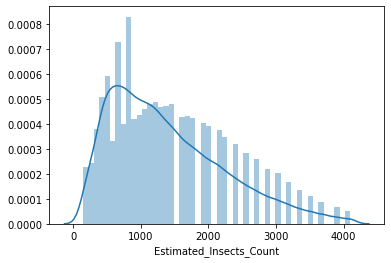

In [18]:
sns.distplot(tdf['Estimated_Insects_Count'])

Estimated Insect count shows skewness in the dataaset & also presence of some outliers.

### Bivariate Analysis

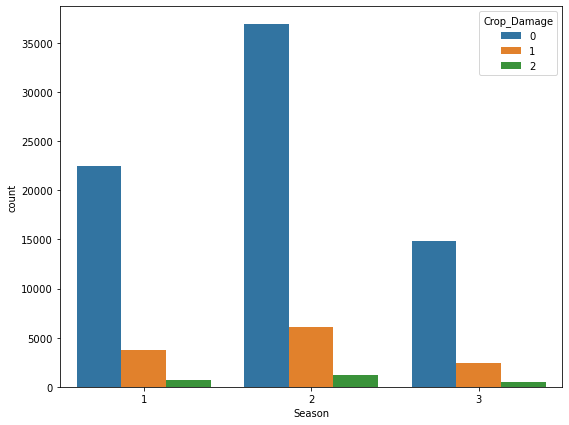

In [19]:
plt.figure(figsize=(9,7))

sns.countplot(tdf['Season'],hue = tdf['Crop_Damage'])

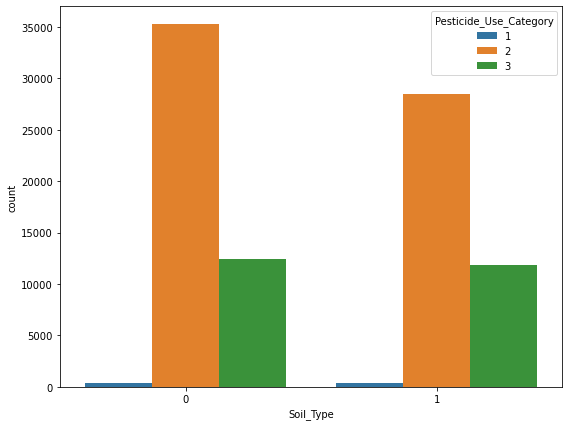

In [20]:
plt.figure(figsize=(9,7))
sns.countplot(tdf['Soil_Type'],hue = tdf['Pesticide_Use_Category'])

* This plot indicates higest usage of pesticides in previous year for both the soil types.
* There are very few cases of no usage of pesticide while farming in either of the soil tyoes ie 1 & 2.
* Current year usage of pesticide is lower in soil_type 1.

In [21]:
n =tdf.groupby('Pesticide_Use_Category')['Crop_Damage',].count()
n

,Crop_Damage
Pesticide_Use_Category,
1,837
2,63709
3,24312


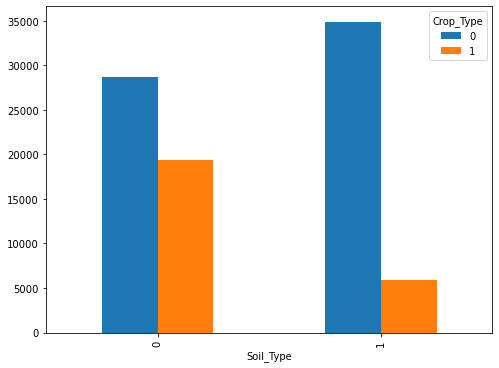

In [22]:
c=pd.pivot_table(tdf, index = 'Soil_Type',columns = 'Crop_Type',values = 'Pesticide_Use_Category', aggfunc = 'count').plot(kind = 'bar',figsize=(8,6))
c
#plt.show()

Observation
* In both the cases we can see that pesticide usage is lowest in both crop_type 1 & soil_type 1
* With either soil types ie 1 or 2 the pesticide usage is highest with crop_type 1.

## Multivariate Analysis

<Figure size 1296x1512 with 0 Axes>

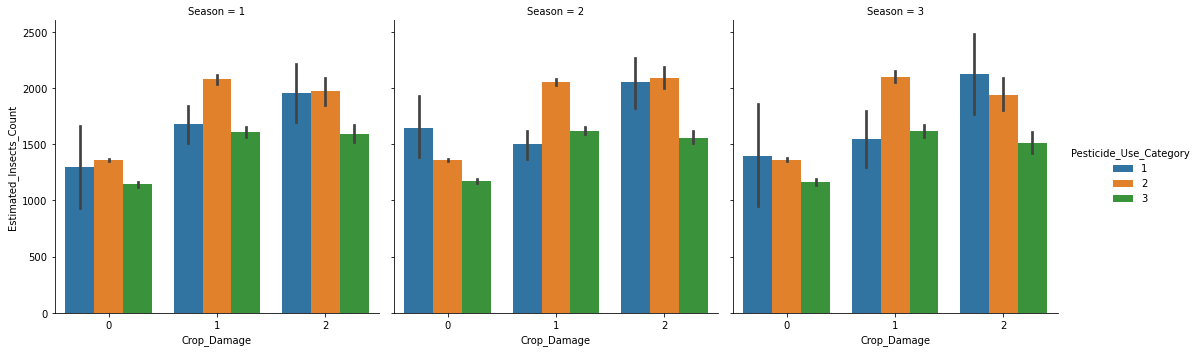

In [23]:
plt.figure(figsize=(18,21))
sns.catplot(x='Crop_Damage',y='Estimated_Insects_Count',hue='Pesticide_Use_Category',
               col = 'Season',kind = 'bar',data = tdf,)

* Crops damaged due to pesicide remains almost consistent throughout all seasons.
* crops without pesticid usage has better survival chances in season 2 as compared to season 1 & 3.

Estimated_Insects_Count       AxesSubplot(0.125,0.536818;0.133621x0.343182)
Crop_Type                  AxesSubplot(0.285345,0.536818;0.133621x0.343182)
Soil_Type                   AxesSubplot(0.44569,0.536818;0.133621x0.343182)
Pesticide_Use_Category     AxesSubplot(0.606034,0.536818;0.133621x0.343182)
Number_Doses_Week          AxesSubplot(0.766379,0.536818;0.133621x0.343182)
Number_Weeks_Used                AxesSubplot(0.125,0.125;0.133621x0.343182)
Number_Weeks_Quit             AxesSubplot(0.285345,0.125;0.133621x0.343182)
Season                         AxesSubplot(0.44569,0.125;0.133621x0.343182)
Crop_Damage                   AxesSubplot(0.606034,0.125;0.133621x0.343182)
dtype: object

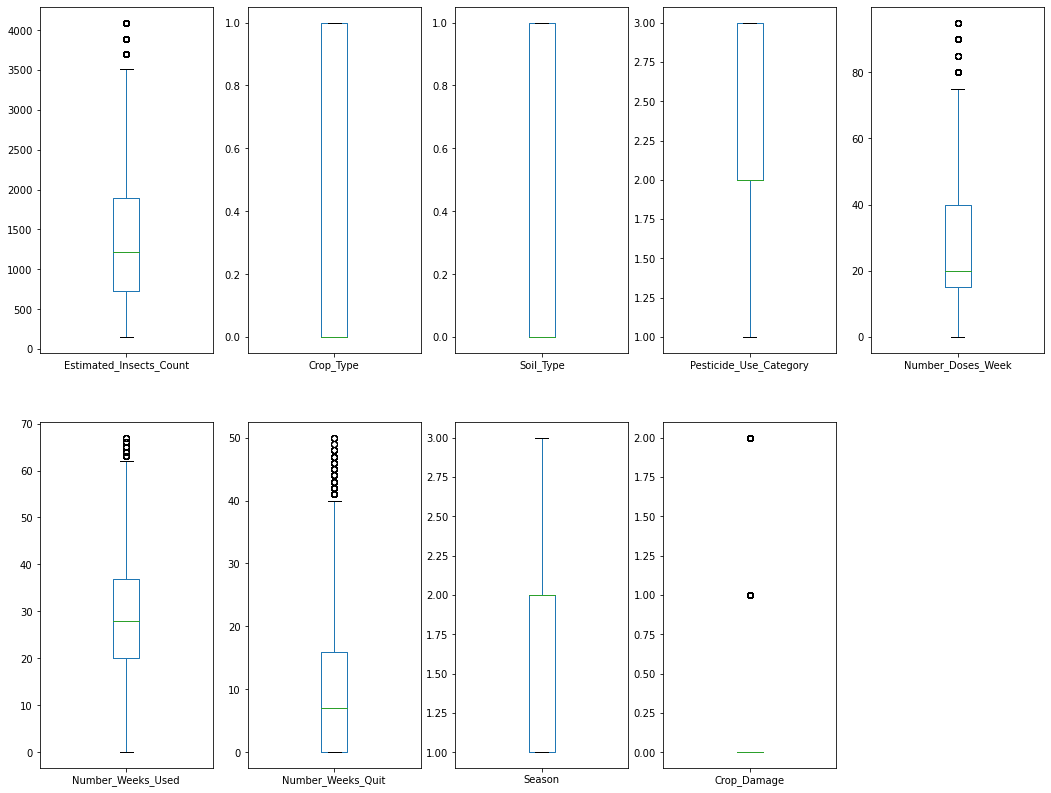

In [24]:
tdf.plot(kind='box',subplots=True,figsize = (18,14),layout=(2,5))

Outliers are present in columns - Estimated_Insects_count,Number_Doses_Week,Numner_Weeks_Used,Number_weeks_quit. 
Let's check the scatterplot tooo to confirm the presence of outliers

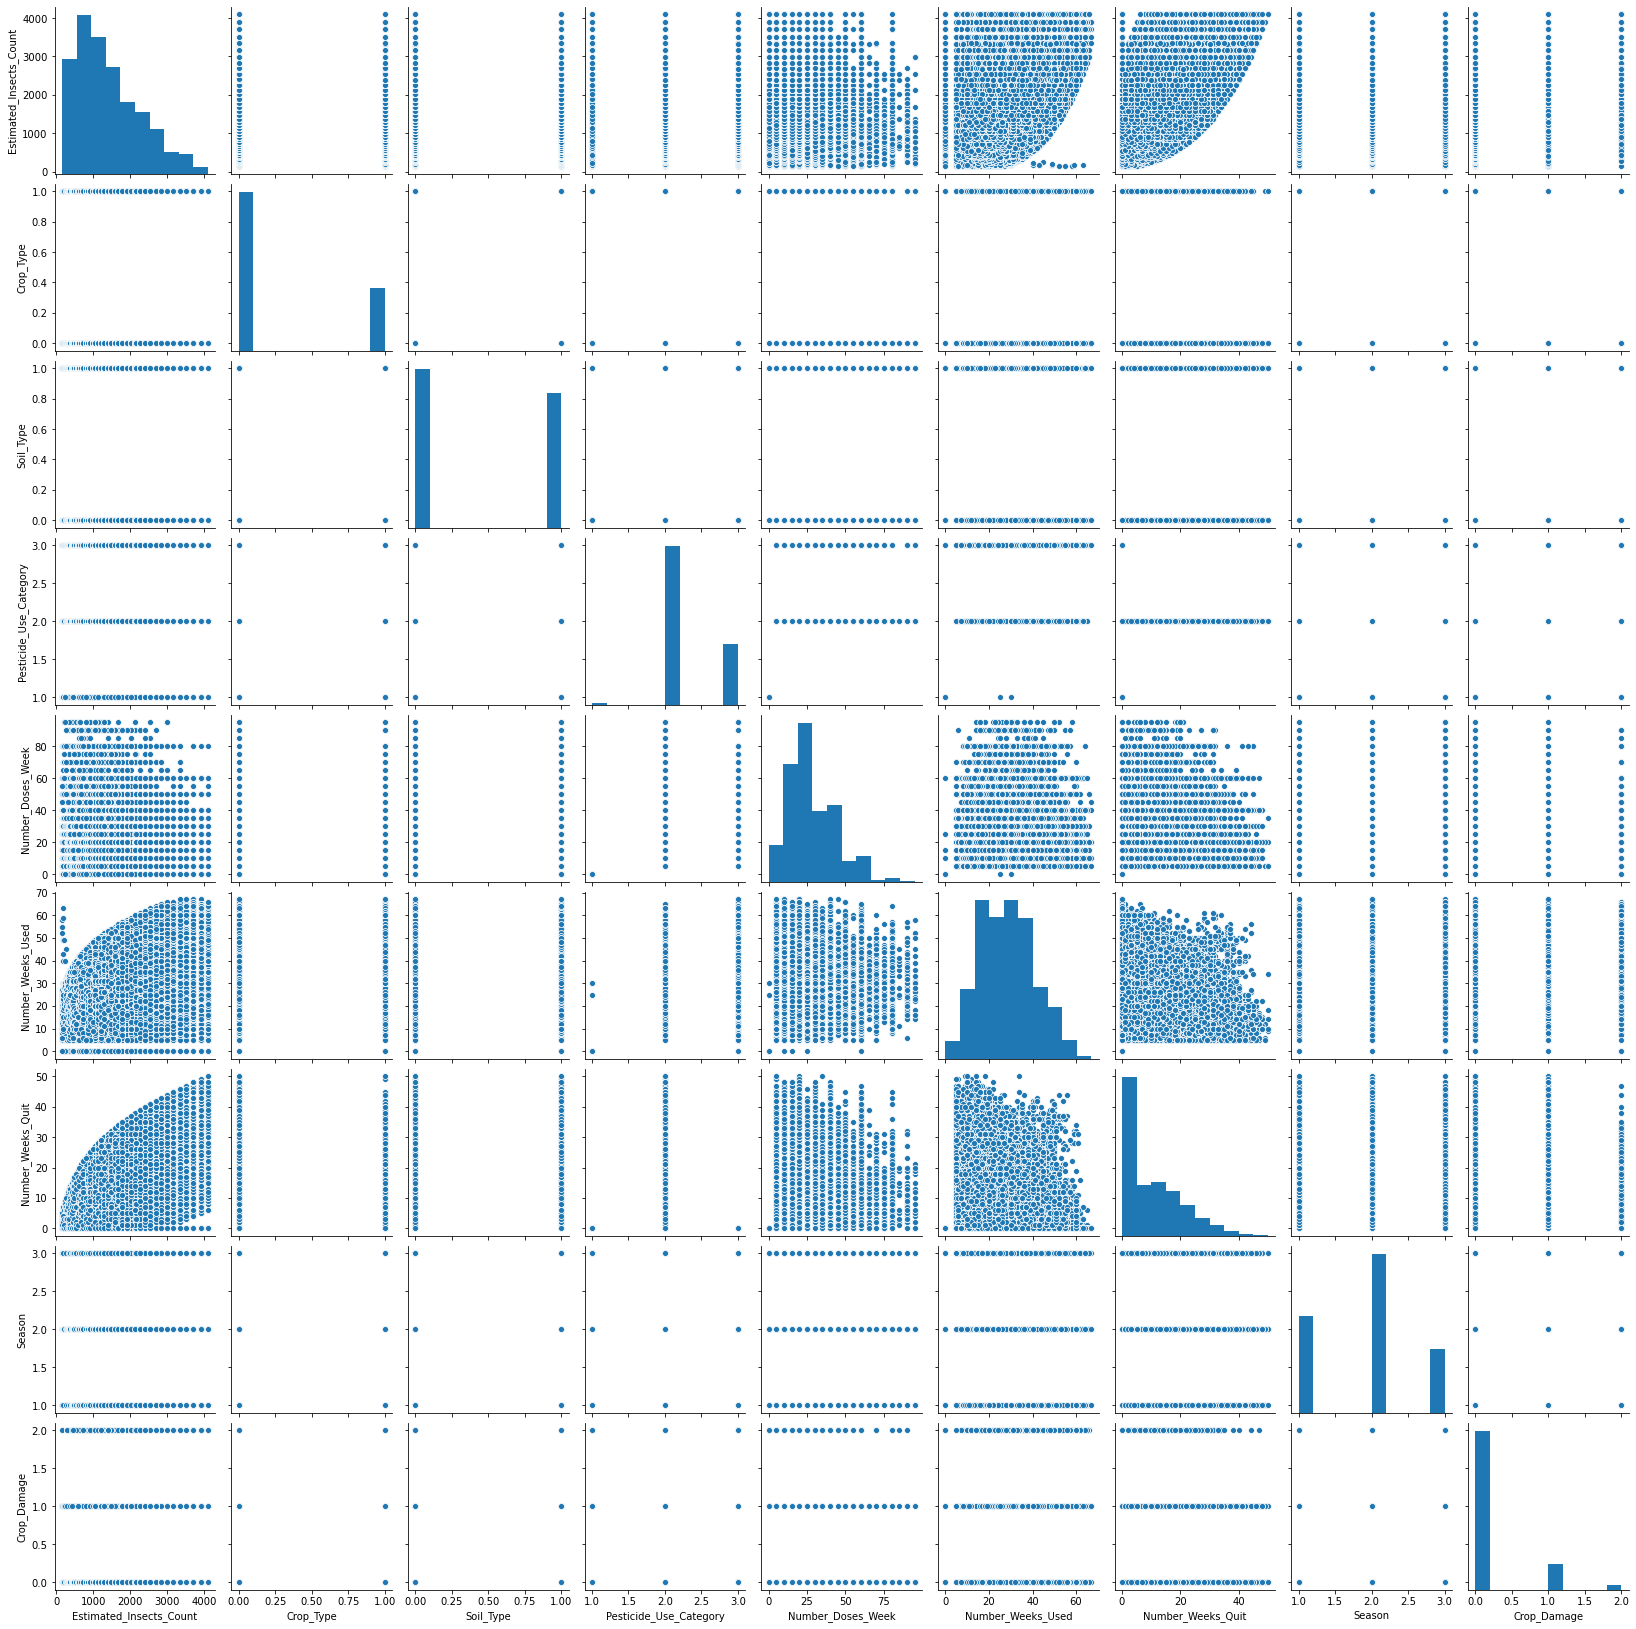

In [25]:
sns.pairplot(data=tdf)

* Number_Doses_Week & Number_Weeks_Quit have a negative linear correation with each other.
* Number_Weeks_Used shows Outliers
* Estimated_Insecs_Count is lesser in Season 2 than 1 & 3
* The Number_Weeks_Used & Number_weeks_Quit has a postive corr with Estimated_Insects_Count where increase in one is increase in another.
* Number_Weeks_Used has a -ve corr with Number_Weeks_Quit, presence of outliers also seen.


### Summary of the visualizations

* Presnece of outliers are seen in columns with continous values. Skewness in the dataset is visible from the pairplots.
* Unique ID columns have unique variable specific to each row, hence dropping that column.


# Outliers

#### Using ZScore method

In [26]:
tdf_1=tdf.drop(['ID'],axis = 1)

In [27]:
from scipy.stats import zscore
z=np.abs(zscore(tdf_1))
threshold = 3
print(np.where(z>3))
tdf_zscore=tdf_1[(z<3).all(axis=1)]
tdf_zscore.shape

(array([    7,     9,    14, ..., 88741, 88770, 88853], dtype=int64), array([8, 8, 8, ..., 8, 4, 6], dtype=int64))


(84913, 9)

#### Using IQR Method

In [28]:
Q1 = tdf_1.quantile(0.25)
Q3 = tdf_1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
tdf_iqr=tdf_1[~((tdf_1 < (Q1 - 1.5 * IQR)) | (tdf_1 > (Q3 + 1.5 * IQR))).any(axis=1)]
tdf_iqr.shape

Estimated_Insects_Count    1167.0
Crop_Type                     1.0
Soil_Type                     1.0
Pesticide_Use_Category        1.0
Number_Doses_Week            25.0
Number_Weeks_Used            17.0
Number_Weeks_Quit            16.0
Season                        1.0
Crop_Damage                   0.0
dtype: float64


(72413, 9)

#####  *** PERCENTAGE LOSS OF DATA WITH DIFFERENT OUTLIERS METHOD

In [29]:
tdf_1.shape

(88858, 9)

In [30]:
zscoreloss = ((88858-84913)/88858)*100
print('Percentage loss using ZScore = ',zscoreloss)
print('\n')
iqrloss = ((88858-72413)/88858)*100
print("Percentage loss using IQR method = ",iqrloss)

Percentage loss using ZScore =  4.439667784555133


Percentage loss using IQR method =  18.507056202030206


###### As can be seen % loss of data for removal of outliers is lesser with zscore - 4.439667784555133 hence will use this method.

In [31]:
tdf_2=tdf_zscore
tdf_2.shape

(84913, 9)

In [32]:
corr=tdf_zscore.corr()
corr

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.084604,-0.054828,-0.077468,-0.095556,0.455959,0.282394,0.002887,0.211065
Crop_Type,-0.084604,1.000000,-0.297345,0.243571,-0.190211,-0.040832,-0.233186,0.001839,-0.028431
Soil_Type,-0.054828,-0.297345,1.000000,0.037198,0.080294,-0.065173,0.008598,0.002354,-0.020016
Pesticide_Use_Category,-0.077468,0.243571,0.037198,1.000000,-0.009517,0.321166,-0.562764,0.003180,0.147552
Number_Doses_Week,-0.095556,-0.190211,0.080294,-0.009517,1.000000,0.118675,-0.033611,-0.000372,-0.041052
Number_Weeks_Used,0.455959,-0.040832,-0.065173,0.321166,0.118675,1.000000,-0.410895,0.002618,0.210109
Number_Weeks_Quit,0.282394,-0.233186,0.008598,-0.562764,-0.033611,-0.410895,1.000000,-0.000257,-0.098365
Season,0.002887,0.001839,0.002354,0.003180,-0.000372,0.002618,-0.000257,1.000000,-0.001912
Crop_Damage,0.211065,-0.028431,-0.020016,0.147552,-0.041052,0.210109,-0.098365,-0.001912,1.000000


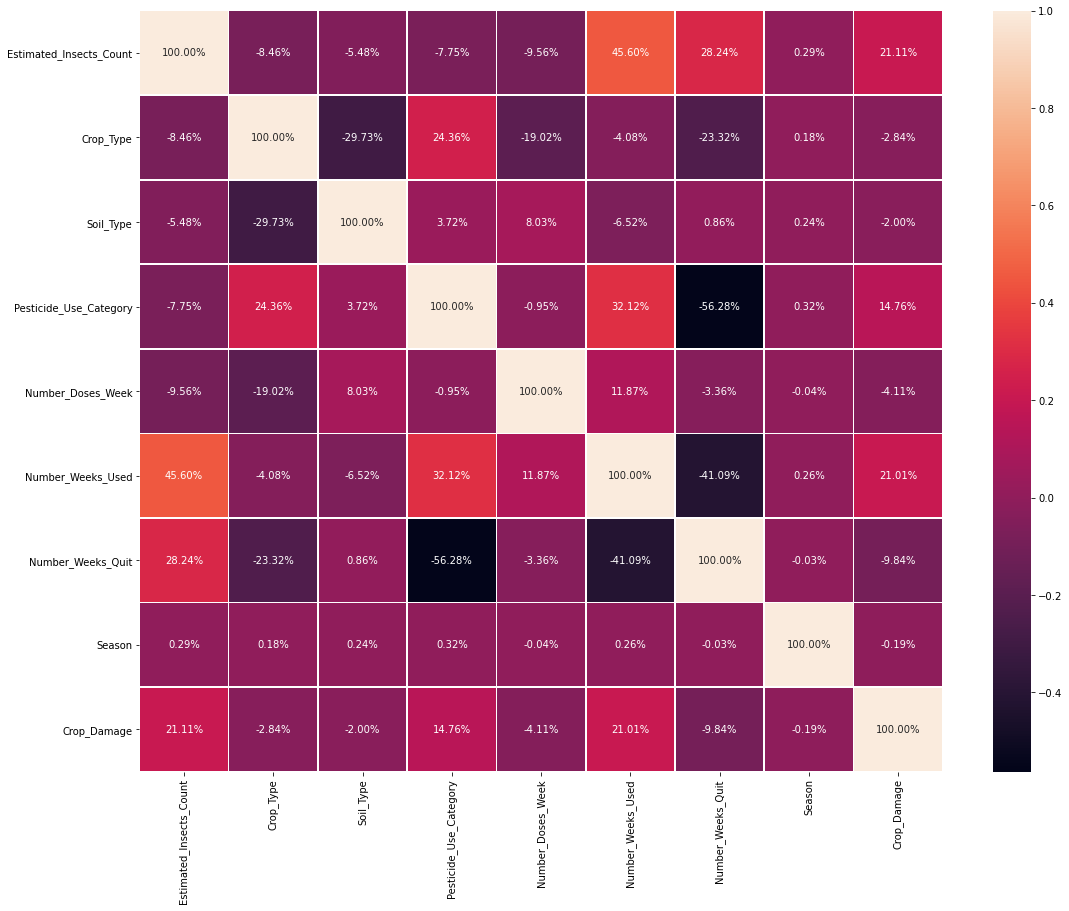

In [33]:
plt.figure(figsize=(18,14))
sns.heatmap(corr,annot=True,fmt='.2%', linewidths=.7)
plt.show()

Observations:

* There is a high corr bween crop damage and estimated_insects_count & numer_weeks_used at 21%
* Pesicide_Use_Category has a corr of 14.76% with crop damage, and soil_type,crop_type,season,numner_doses_week & numbe_doses quit all these have a -ve corr with crop_type ranging between 0 till -10%.
* A very hig +ve corr of 45.60 is seen with Estimated_Insects_Count with Number_Weeks_Used
* A ver high -ve corr of >50% is seen of number_weeks_quit with Pesticide_use_categoy 
* -ve corr of around 41% is seen with Number_Weeks_Quit with Number_Weeks_Used.
* Crop_Type with Soil_Type has a -ve corr of around -30%

## Skewness

In [34]:
tdf_1.skew()

Estimated_Insects_Count    0.839146
Crop_Type                  0.955978
Soil_Type                  0.166914
Pesticide_Use_Category     0.779488
Number_Doses_Week          0.962879
Number_Weeks_Used          0.242512
Number_Weeks_Quit          0.892773
Season                     0.145228
Crop_Damage                2.367816
dtype: float64

* There is little skewness is seen columns - Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Quit.
* Lets check with distplot the skewness spread

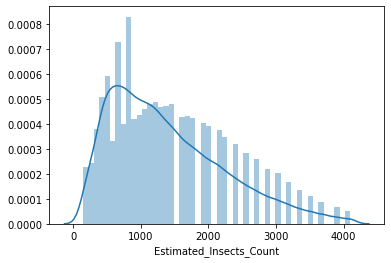

In [35]:
sns.distplot(tdf_1['Estimated_Insects_Count'])

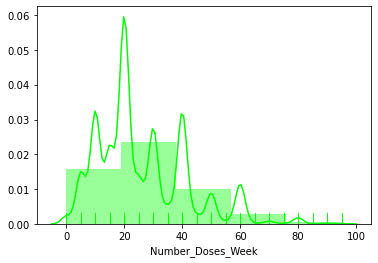

In [36]:
sns.distplot(tdf_1['Number_Doses_Week'],bins = 5,color = 'lime',kde = True,rug = True)

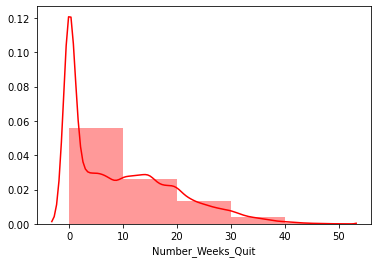

In [37]:
sns.distplot(tdf_1['Number_Weeks_Quit'],color = 'r',bins = 5)

In [38]:
from scipy.stats import boxcox
from sklearn.preprocessing import power_transform

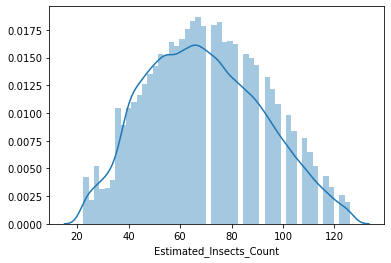

In [39]:
tdf_1['Estimated_Insects_Count']=boxcox(tdf_1['Estimated_Insects_Count'],0.5)
sns.distplot(tdf_1['Estimated_Insects_Count'])

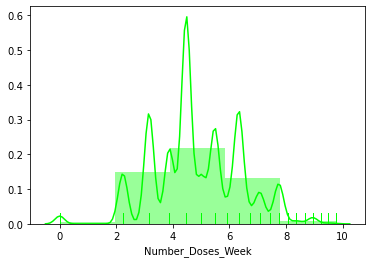

In [40]:
tdf_1['Number_Doses_Week']=np.sqrt(tdf_1['Number_Doses_Week'])
sns.distplot(tdf_1['Number_Doses_Week'],bins = 5,color = 'lime',kde = True,rug = True)

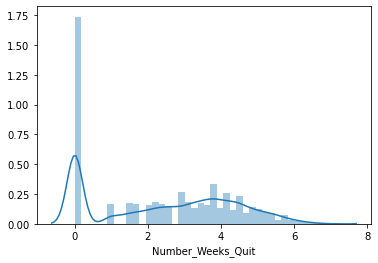

In [41]:
tdf_1['Number_Weeks_Quit']=np.sqrt(tdf_1['Number_Weeks_Quit'],)
sns.distplot(tdf_1['Number_Weeks_Quit'])

In [42]:
tdf_1.skew()

Estimated_Insects_Count    0.233920
Crop_Type                  0.955978
Soil_Type                  0.166914
Pesticide_Use_Category     0.779488
Number_Doses_Week          0.057880
Number_Weeks_Used          0.242512
Number_Weeks_Quit          0.015768
Season                     0.145228
Crop_Damage                2.367816
dtype: float64

Treated the skewness using np.sqrt method, crop_type, pesticide_use_category are category datas and hence not treated the skewness. crop_damage is target vaiable hence left it without trwating.

### Conclusion of EDA

* From above we can conclude that no null values are present in the data, the outliers are removed using zscore, skewness is treated using boxcox & np.sqrt based as better output result with less loss of data.

# Model Building

Lets split the data fro training.

In [43]:
tdf_1

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,25.422618,1,0,1,0.000000,0,0.000000,1,0
1,26.913665,1,0,1,0.000000,0,0.000000,2,1
2,30.062439,1,0,1,0.000000,0,0.000000,2,1
3,30.062439,1,1,1,0.000000,0,0.000000,2,1
4,34.986484,1,0,1,0.000000,0,0.000000,2,1
...,...,...,...,...,...,...,...,...,...
88853,113.533545,1,0,2,3.162278,12,6.633250,3,0
88854,116.591737,1,0,2,3.162278,20,6.164414,1,0
88855,116.591737,1,0,2,3.872983,40,2.828427,2,0
88856,119.688126,1,0,2,3.162278,25,4.242641,3,0


In [44]:
x=tdf_1.drop(['Crop_Damage'],axis=1)
x

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,25.422618,1,0,1,0.000000,0,0.000000,1
1,26.913665,1,0,1,0.000000,0,0.000000,2
2,30.062439,1,0,1,0.000000,0,0.000000,2
3,30.062439,1,1,1,0.000000,0,0.000000,2
4,34.986484,1,0,1,0.000000,0,0.000000,2
...,...,...,...,...,...,...,...,...
88853,113.533545,1,0,2,3.162278,12,6.633250,3
88854,116.591737,1,0,2,3.162278,20,6.164414,1
88855,116.591737,1,0,2,3.872983,40,2.828427,2
88856,119.688126,1,0,2,3.162278,25,4.242641,3


In [45]:
y=tdf.iloc[:,-1]
y

0        0
1        1
2        1
3        1
4        1
        ..
88853    0
88854    0
88855    0
88856    0
88857    0
Name: Crop_Damage, Length: 88858, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = .30, random_state = 49,stratify = y)

In [50]:
gnb = GaussianNB()
knc = KNeighborsClassifier()
rfc = RandomForestClassifier()

In [51]:
model = [gnb,knc,rfc]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm = m.predict(x_test)
    print('Accuracy score of ', m, 'is: ' )
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test, predm))
    print(classification_report(y_test,predm))
    print('\n')
    cross_val = cross_val_score(m,x,y,cv = 3)
    print('Cross Validation of ',m, 'is: ' )
    print('Mean CV of ',m, 'is: ',cross_val.mean(),'and','Std CV of ', m, 'is: ',cross_val.std())
    print('\n')

Accuracy score of  GaussianNB() is: 
0.8205416760447145
[[20971  1299     2]
 [ 2789   902     1]
 [  433   260     1]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     22272
           1       0.37      0.24      0.29      3692
           2       0.25      0.00      0.00       694

    accuracy                           0.82     26658
   macro avg       0.49      0.40      0.40     26658
weighted avg       0.78      0.82      0.79     26658



Cross Validation of  GaussianNB() is: 
Mean CV of  GaussianNB() is:  0.8198699008201671 and Std CV of  GaussianNB() is:  0.003936166316259175


Accuracy score of  KNeighborsClassifier() is: 
0.8235426513616926
[[21171  1070    31]
 [ 2881   776    35]
 [  475   212     7]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     22272
           1       0.38      0.21      0.27      3692
           2       0.10      0.01      0.02       694

    a

# *******************************************************************************************
The best score for the case is using RandomForestClassifier with accuracy score - 82.58% | CV = 82.51%

## Hypertuning 

In [52]:
parameters = {'criterion': ['gini','entropy'],'bootstrap' : [True,False]}
clf=GridSearchCV(rfc,parameters,cv = 3)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'bootstrap': True, 'criterion': 'gini'}


In [53]:
parameters = {'n_estimators': [50,100,200,300],'min_samples_split' : [2,3,5]}
clf=GridSearchCV(rfc,parameters,cv = 3)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'min_samples_split': 5, 'n_estimators': 300}


In [59]:
rfc = RandomForestClassifier(bootstrap = 'True',criterion = 'gini',n_estimators = 300,min_samples_split = 5)
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
pred_rfc=rfc.predict(x_test)
print('Accuracy score of ', RandomForestClassifier, 'is: ' )
print(accuracy_score(y_test,predm))
print(confusion_matrix(y_test, predm))
print(classification_report(y_test,predm))
print('\n')
cross_val = cross_val_score(rfc,x,y,cv = 3)
print('Cross Validation of RFC is: ',cross_val)
print('Mean CV of RFC is: ',cross_val.mean(),'and Std CV of RFC is: ',cross_val.std())
print('************************************************************************************************************************')

Accuracy score of  <class 'sklearn.ensemble._forest.RandomForestClassifier'> is: 
0.8257558706579639
[[21235   921   116]
 [ 2814   739   139]
 [  442   213    39]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     22272
           1       0.39      0.20      0.27      3692
           2       0.13      0.06      0.08       694

    accuracy                           0.83     26658
   macro avg       0.46      0.40      0.42     26658
weighted avg       0.78      0.83      0.80     26658



Cross Validation of RFC is:  [0.83858879 0.83564604 0.83834701]
Mean CV of RFC is:  0.8375272787873622 and Std CV of RFC is:  0.0013338953106575213
************************************************************************************************************************


The score for best fit model is hypertuned & treated for under & overfitting.
Best fit model is Random Forest Classifier with accuracy_score = 82.58% & cross_val score = 83.75%

## Saving the best fit model

In [60]:
import pickle
filename = 'agriculture_train.pkl'
pickle.dump(rfc,open(filename,'wb'))


## Using the test data

In [64]:
read_file = pd.read_excel ('test_agriculture.xlsx')
read_file.to_csv ('test_agriculture.csv', index = None, header=True)

In [66]:
test_df=pd.read_csv('test_agriculture.csv')

In [67]:
test_df.shape

(1199, 9)

In [68]:
test_df.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

* There is only one column which has null value, will fill that using bfill method.

In [69]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1199 non-null   object 
 1   Estimated_Insects_Count  1199 non-null   int64  
 2   Crop_Type                1199 non-null   int64  
 3   Soil_Type                1199 non-null   int64  
 4   Pesticide_Use_Category   1199 non-null   int64  
 5   Number_Doses_Week        1199 non-null   int64  
 6   Number_Weeks_Used        1080 non-null   float64
 7   Number_Weeks_Quit        1199 non-null   int64  
 8   Season                   1199 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 84.4+ KB


* ID column is the unique data column which was removed in train data hence will drop the same in test data too

In [79]:
test_df1=test_df.drop(['ID'],axis = 1)
test_df1

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,1,1,0,NaN,0,2
1,410,1,1,1,0,0.0,0,2
2,626,1,0,1,0,0.0,0,2
3,731,1,0,1,0,0.0,0,2
4,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...
1194,1132,0,1,2,40,34.0,7,3
1195,1132,0,1,2,40,25.0,3,1
1196,1132,0,1,2,20,13.0,23,1
1197,1212,0,1,2,10,35.0,5,1


In [84]:
test_df1['Number_Weeks_Used']=test_df1['Number_Weeks_Used'].fillna(method='bfill')

In [86]:
test_df1['Number_Weeks_Used'].isnull().sum()

0

### Check outliers and skewness of the data

* Will check for outliers & skewness of the data & treat the same if need be. 

In [88]:
test_df1.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000
mean,1288.737281,0.194329,0.455379,2.383653,26.555463,29.241868,7.052544,1.881568
std,845.004912,0.395848,0.498213,0.522866,16.154101,12.804353,8.863634,0.685640
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,677.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000
50%,1056.000000,0.000000,0.000000,2.000000,20.000000,28.000000,3.000000,2.000000
75%,1785.000000,0.000000,1.000000,3.000000,40.000000,38.000000,13.000000,2.000000
max,4097.000000,1.000000,1.000000,3.000000,90.000000,64.000000,42.000000,3.000000


#### Observations:

* Estimated_Insects_Count mean for test data = 1288.73 | std = 845. there is huge gap between the max & 75th percentile values indicating outliers & skewness in the data.
* Number_Doses_Week mean fr test data - 25.56 & std= 16.15, there is huge difference in the max value & 75th percentile indicating outliers & skewness in the data.
* Number_Weeks_Used mean for test data = 29.24 & std = 12.80, the data is normally distributed.
* 	Number_Weeks_Quit mean = 7.05 & std = 8.86, the difference between 75th percentile & max value indicating outlier & skewness in the data.
* Crop_Type,Soil_Type,Pesticide_Use_Category, & Season are all category datas.

Estimated_Insects_Count       AxesSubplot(0.125,0.536818;0.133621x0.343182)
Crop_Type                  AxesSubplot(0.285345,0.536818;0.133621x0.343182)
Soil_Type                   AxesSubplot(0.44569,0.536818;0.133621x0.343182)
Pesticide_Use_Category     AxesSubplot(0.606034,0.536818;0.133621x0.343182)
Number_Doses_Week          AxesSubplot(0.766379,0.536818;0.133621x0.343182)
Number_Weeks_Used                AxesSubplot(0.125,0.125;0.133621x0.343182)
Number_Weeks_Quit             AxesSubplot(0.285345,0.125;0.133621x0.343182)
Season                         AxesSubplot(0.44569,0.125;0.133621x0.343182)
dtype: object

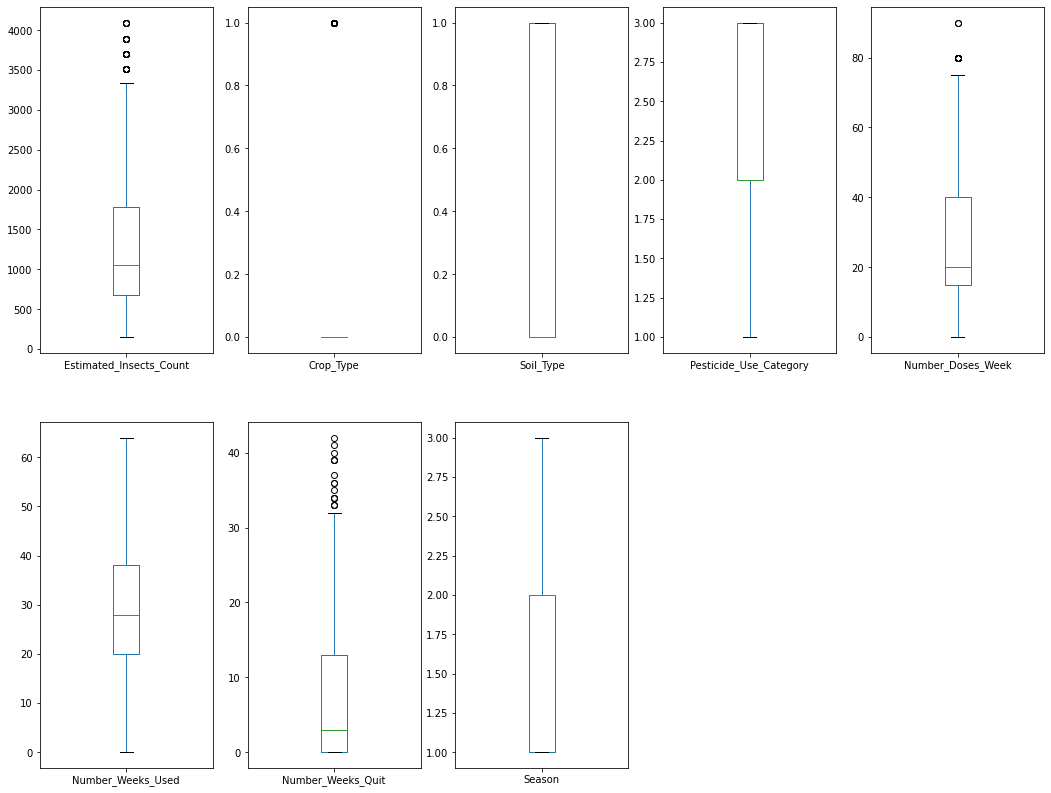

In [87]:
test_df1.plot(kind='box',subplots=True,figsize = (18,14),layout=(2,5))

In [91]:
test_df1.skew()

Estimated_Insects_Count    1.098665
Crop_Type                  1.546968
Soil_Type                  0.179422
Pesticide_Use_Category     0.089675
Number_Doses_Week          0.872028
Number_Weeks_Used          0.175339
Number_Weeks_Quit          1.191013
Season                     0.155872
dtype: float64

## Outilers

In [92]:
from scipy.stats import zscore
z=np.abs(zscore(test_df1))
threshold = 3
print(np.where(z>3))
tdf_zscore=test_df1[(z<3).all(axis=1)]
tdf_zscore.shape

(array([  50,   83,  129,  136,  179,  255,  280,  281,  282,  501,  502,
        503,  535,  574,  613,  630,  751,  775,  827,  829,  853,  868,
        870,  871,  883,  890,  895,  897,  902,  904,  910,  911,  912,
        913,  914,  915,  916, 1030, 1152], dtype=int64), array([4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 4, 4], dtype=int64))


(1160, 8)

In [93]:
test_df1.shape

(1199, 8)

In [94]:
Q1 = test_df1.quantile(0.25)
Q3 = test_df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
test_iqr=test_df1[~((test_df1 < (Q1 - 1.5 * IQR)) | (test_df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
test_iqr.shape

Estimated_Insects_Count    1108.0
Crop_Type                     0.0
Soil_Type                     1.0
Pesticide_Use_Category        1.0
Number_Doses_Week            25.0
Number_Weeks_Used            18.0
Number_Weeks_Quit            13.0
Season                        1.0
dtype: float64


(915, 8)

In [96]:
(1199-1160)/1199*100 ## % loss of data using zscore for outlier removal.

3.252710592160134

In [97]:
test_df2=tdf_zscore

In [98]:
test_df2.shape

(1160, 8)

In [99]:
test_df2.skew()

Estimated_Insects_Count    1.013185
Crop_Type                  1.515496
Soil_Type                  0.148878
Pesticide_Use_Category     0.069452
Number_Doses_Week          0.645208
Number_Weeks_Used          0.179251
Number_Weeks_Quit          1.032108
Season                     0.159728
dtype: float64

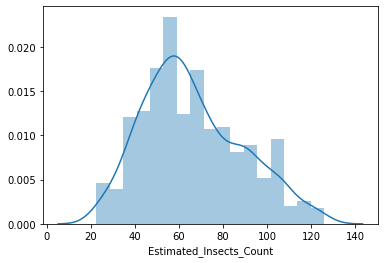

In [100]:
test_df1['Estimated_Insects_Count']=boxcox(test_df1['Estimated_Insects_Count'],0.5)
sns.distplot(test_df1['Estimated_Insects_Count'])

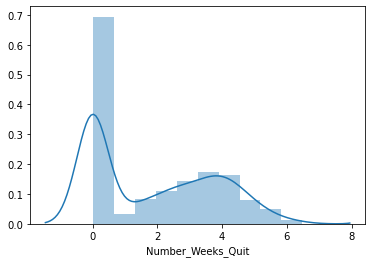

In [103]:
test_df1['Number_Weeks_Quit']=np.sqrt(test_df1['Number_Weeks_Quit'])
sns.distplot(test_df1['Number_Weeks_Quit'])

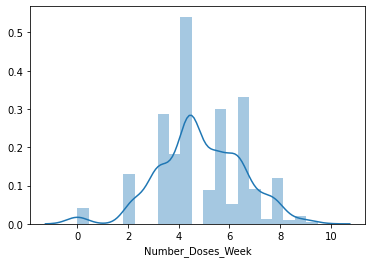

In [105]:
test_df1['Number_Doses_Week']=np.sqrt(test_df1['Number_Doses_Week'])
sns.distplot(test_df1['Number_Doses_Week'])

In [106]:
test_df1.skew()

Estimated_Insects_Count    0.481273
Crop_Type                  1.546968
Soil_Type                  0.179422
Pesticide_Use_Category     0.089675
Number_Doses_Week         -0.149741
Number_Weeks_Used          0.175339
Number_Weeks_Quit          0.391417
Season                     0.155872
dtype: float64

In [109]:
fitted_model=pickle.load(open('agriculture_train.pkl','rb'))

In [110]:
fitted_model

RandomForestClassifier(bootstrap='True', min_samples_split=5, n_estimators=300)

In [111]:
predictions = fitted_model.predict(test_df1)

In [112]:
predictions

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)